In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras import backend as K
import tensorflowjs as tfjs
K.set_image_dim_ordering('tf')

Using TensorFlow backend.
W0524 14:57:51.934827 17824 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
# Loads in csv files
train = pd.read_csv("sentiment_data_train.csv").values
test  = pd.read_csv("sentiment_data_test.csv").values
xTrain = train[:, 1]
yTrain = train[:, 0]
xTest = test[:, 1]
yTest = test[:, 0]
# Prints length of test and training datasets
print("Length of Training Data:", len(xTrain))
print("Length of Test Data:", len(xTest))

Length of Training Data: 22966
Length of Test Data: 5742


In [5]:
# Loads raw data into test and training sets
trainX = []
testX = []
# Training set
for line in xTrain:
    data = np.asarray([int(x) for x in line.split()])
    trainX.append(data)
trainX = np.array(trainX)
# Test set
for line in xTest:
    data = np.asarray([int(x) for x in line.split()])
    testX.append(data)
testX = np.array(testX)

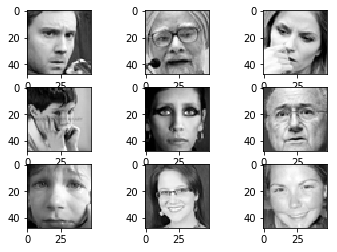

In [6]:
# Reshapes and standardizes images with a size of 48x48
trainX = ((trainX.reshape(trainX.shape[0], 48, 48)).astype('float32')) / 255.0
testX = ((testX.reshape(testX.shape[0], 48, 48)).astype('float32')) / 255.0
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)
# Displays augmented images from training set
for i in range (0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
# Builds model
model = Sequential()

# CNN with 3 hidden layers
model.add(Conv2D(32, (3, 3), input_shape = trainX[0].shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape = trainX[0].shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), input_shape = trainX[0].shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(7, activation= 'softmax'))

# Compiles model on training data and validates based on test data
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
model.fit(trainX, yTrain, epochs = 12, batch_size = 256, validation_data = (testX, yTest))

Instructions for updating:
Colocations handled automatically by placer.


W0524 15:15:32.359523 17824 deprecation.py:323] From C:\Users\lklkl\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0524 15:15:32.582694 17824 deprecation.py:506] From C:\Users\lklkl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


W0524 15:15:32.774705 17824 deprecation.py:323] From C:\Users\lklkl\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 22966 samples, validate on 5742 samples
Epoch 1/12
22966/22966 [==============================] - 69s 3ms/step - loss: 1.8520 - acc: 0.2152 - val_loss: 1.7986 - val_acc: 0.2631
Epoch 2/12
22966/22966 [==============================] - 72s 3ms/step - loss: 1.7472 - acc: 0.2825 - val_loss: 1.6201 - val_acc: 0.3692
Epoch 3/12
22966/22966 [==============================] - 69s 3ms/step - loss: 1.5837 - acc: 0.3804 - val_loss: 1.4722 - val_acc: 0.4255
Epoch 4/12
22966/22966 [==============================] - 74s 3ms/step - loss: 1.4883 - acc: 0.4208 - val_loss: 1.4006 - val_acc: 0.4666
Epoch 5/12
22966/22966 [==============================] - 77s 3ms/step - loss: 1.4052 - acc: 0.4584 - val_loss: 1.3248 - val_acc: 0.4983
Epoch 6/12
22966/22966 [==============================] - 76s 3ms/step - loss: 1.3387 - acc: 0.4838 - val_loss: 1.2812 - val_acc: 0.5181
Epoch 7/12
22966/22966 [==============================] - 76s 3ms/step - loss: 1.2848 - acc: 0.5098 - val_loss: 1.2549 - val_acc:

In [8]:
score = model.evaluate(testX, yTest, verbose = 0)
print("Test Set Accuracy:", score[1])
print("Test Set Loss:", score[0])

Test Set Accuracy: 0.5595611285266457
Test Set Loss: 1.1805923896481956


In [9]:
# Saves model to H5
tfjs.converters.save_keras_model(model, 'Model')